In [1]:
import pandas as pd

In [2]:

dfs = dict(
    rounds200_pytorch_mnist = pd.read_csv("data/executions/200rounds_pytorch-with-stress-at-036.csv"),
    rounds50_pytorch_cifar = pd.read_csv("data/executions/50rounds_pytorch-cifar10.csv"),
    rounds50_tensorflow_cifar = pd.read_csv("data/executions/50rounds_tensorflow-cifar10.csv"),
    rounds50_tensorflow_mnist = pd.read_csv("data/executions/50rounds_tensorflow-mnist.csv"),
    rounds50_pytorch_mnist = pd.read_csv("data/executions/50rounds_pytorch-mnist.csv"),
)


In [3]:
selected_nodes = [ 10, 12, 13, 16, 22, 25, 30,  6, 35, 5]
nodes = [f"aeros1-compute0{i}" if i>=10 else f"aeros1-compute00{i}" for i in selected_nodes] 

In [4]:
overall = None
for _, df in dfs.items():
    if overall is None:
        overall = df.copy()
    else:
        overall = overall.append(df)

/tmp/ipykernel_49662/161976504.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall = overall.append(df)
/tmp/ipykernel_49662/161976504.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall = overall.append(df)
/tmp/ipykernel_49662/161976504.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall = overall.append(df)


In [5]:
overall = overall[overall.hostname.isin(nodes)]

In [6]:
overall["prediction"] = overall.currentCpuUsage*0.5882581301383137 + 8.731840416214968

In [7]:
overall.to_csv("all_trials.csv")

In [8]:
overall["error"] = (overall["prediction"] - overall["currentPowerConsumption"])/overall["currentPowerConsumption"]
overall["error"] = overall["error"].abs()
overall["error"].mean()

0.5114535657161606

In [11]:
for _, df in dfs.items():
    df["timestamp"] = pd.to_datetime(df["timestamp"])

In [12]:

duration_and_power = []
for key, df in dfs.items():
    duration_and_power.append(
        dict(
            name = key, 
            duration = (df.timestamp.max() - df.timestamp.min()).seconds,
            power_consumption = df[df.hostname.isin(nodes)].groupby("hostname").currentPowerConsumption.mean().mean(),
            cpu_usage = df[df.hostname.isin(nodes)].groupby("hostname").currentCpuUsage.mean().mean(),
            energy = df[df.hostname.isin(nodes)].groupby("hostname").currentPowerConsumption.sum().sum()

        )
    )
    
    

<AxesSubplot:title={'center':'Duration'}, xlabel='Experiment', ylabel='Seconds'>

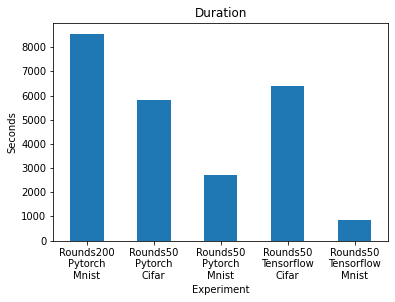

In [13]:
temp_df = pd.DataFrame(duration_and_power)[["name", "duration"]]
temp_df = temp_df.sort_values("name")
temp_df["Experiment"] = temp_df["name"].str.replace("_", "\n").str.title()
temp_df.plot.bar(x="Experiment", rot=0, ylabel="Seconds", legend = False, title="Duration")

<AxesSubplot:title={'center':'Current Power Needs'}, xlabel='Experiment', ylabel='Watts'>

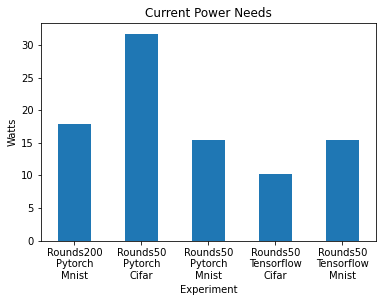

In [14]:
temp_df = pd.DataFrame(duration_and_power)[["name", "power_consumption"]]
temp_df = temp_df.sort_values("name")
temp_df["Experiment"] = temp_df["name"].str.replace("_", "\n").str.title()
temp_df.plot.bar(x="Experiment", rot=0, ylabel="Watts", legend = False, title="Current Power Needs")

<AxesSubplot:title={'center':'Energy Consumption'}, xlabel='Experiment', ylabel='Joules'>

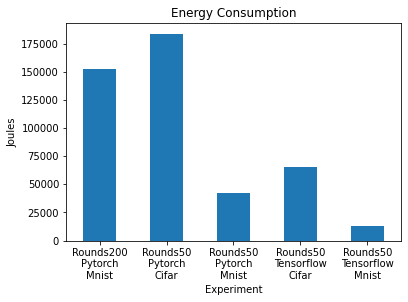

In [15]:
temp_df = pd.DataFrame(duration_and_power)[["name", "duration", "power_consumption"]]
temp_df = temp_df.sort_values("name")
temp_df["Energy"] = temp_df["duration"] * temp_df["power_consumption"]
temp_df["Experiment"] = temp_df["name"].str.replace("_", "\n").str.title()
temp_df[["Experiment", "Energy"]].plot.bar(x="Experiment", rot=0, ylabel="Joules", legend = False, title="Energy Consumption")

<AxesSubplot:title={'center':'Average CPU Usage'}, xlabel='Experiment', ylabel='CPU utilization (%)'>

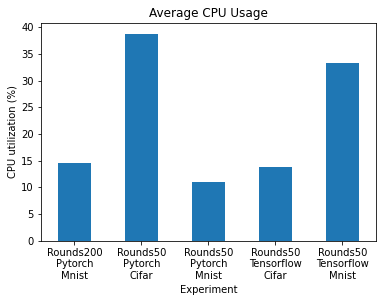

In [16]:
temp_df = pd.DataFrame(duration_and_power)[["name", "duration", "cpu_usage"]]
temp_df = temp_df.sort_values("name")
temp_df["Experiment"] = temp_df["name"].str.replace("_", "\n").str.title()
temp_df[["Experiment", "cpu_usage"]].plot.bar(x="Experiment", rot=0, ylabel="CPU utilization (%)", legend = False, title="Average CPU Usage")